In [1]:
import cmlreaders as cml
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import warnings; warnings.simplefilter('ignore')
pd.options.display.max_columns=None
pd.options.display.max_rows=100
from IPython.display import display, Markdown, HTML
import pandas_to_pybeh as pb
from tqdm import tqdm_notebook as lol
import time
import scipy
import rep_pybeh as rpb
from plotting import *
error_bars ={'elinewidth':3, 'capsize':5, 'capthick':3}
data_set = 'hospital'

In [2]:
scalp = pd.read_csv('scalp_min_crp.csv', index_col = 0)
hosp = pd.read_csv('hospital_min_crp.csv', index_col = 0)
mturk = pd.read_csv('mturk_min_crp.csv', index_col = 0)
# scalp.subject.nunique(), hosp.subject.nunique(), mturk.subject.nunique()

In [3]:
def plot_min_crp(min_crps, data_set, marker, color):
    sns.lineplot(data = min_crps[min_crps.lag < 0], x = 'lag', y = 'prob', color = color, err_style = 'bars',
                 linewidth = 3.5, err_kws = error_bars, zorder=0)
    sns.lineplot(data = min_crps[min_crps.lag > 0] , x = 'lag', y = 'prob', color = color, err_style = 'bars',
                 linewidth = 3.5, err_kws = error_bars, zorder=0)
    g = sns.scatterplot(data=min_crps.groupby('lag').mean().reset_index(), x = 'lag', y = 'prob', marker=marker,
                        color = color, s= 50, label = data_set, edgecolor="black", zorder=10)

    _ = plt.ylabel('Conditional Reponse \nProbability', fontsize = 30)
    _ = plt.xlabel('Lag')
    _ = plt.legend()
    locs, labels = plt.xticks() 


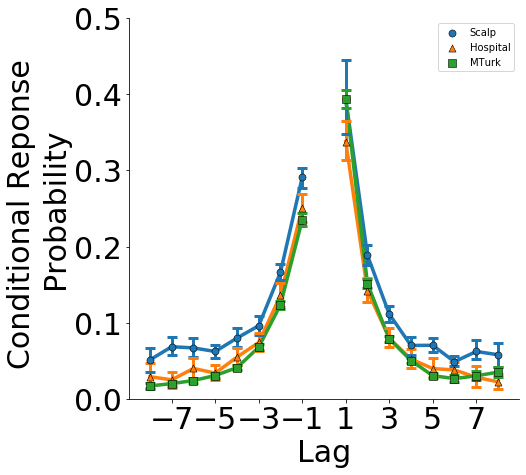

In [4]:
set_axes(ylim = [0, 0.5], fontsize = 30, xticks = np.arange(-7, 8, 2))
plot_min_crp(scalp, 'Scalp', 'o', 'C0')
plot_min_crp(hosp, 'Hospital', '^', 'C1')
plot_min_crp(mturk, 'MTurk', 's', 'C2')
plt.savefig('all_studies_min_crp.pdf', bbox_inches= 'tight')

In [8]:
scalp.reset_index().subject.nunique(), hosp.reset_index().subject.nunique(), mturk.reset_index().subject.nunique()

AttributeError: 'DataFrame' object has no attribute 'subject'

,index,lag,prob
0,18,-8,0.000000
1,19,-7,0.000000
2,20,-6,0.093750
3,21,-5,0.088235
4,22,-4,0.021277
...,...,...,...
5333,30,4,0.017544
5334,31,5,0.102564
5335,32,6,0.058824
5336,33,7,0.000000
